### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Explore Data

In [2]:
df_walmart = pd.read_excel("Walmart-Superstore.xls")
df_walmart.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.360,2,0.0,6.4128
1,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,0.2,31.1980
2,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,0.0000
3,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816
4,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152


In [3]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df_walmart.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df_walmart.shape

(9994, 21)

In [6]:
df_walmart.nunique()

Row ID           9975
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

### Exploratory Data Analysis

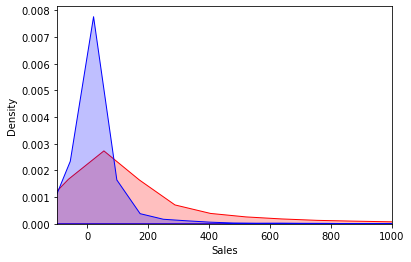

In [7]:
sns.kdeplot(df_walmart['Sales'], color = 'red', label = 'Sales', shade = True)
sns.kdeplot(df_walmart['Profit'], color = 'blue', label = 'Profit', shade = True)
plt.xlim([-100, 1000])
plt.show()

### Pairplot analysis of each column

In [8]:
df_walmart.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

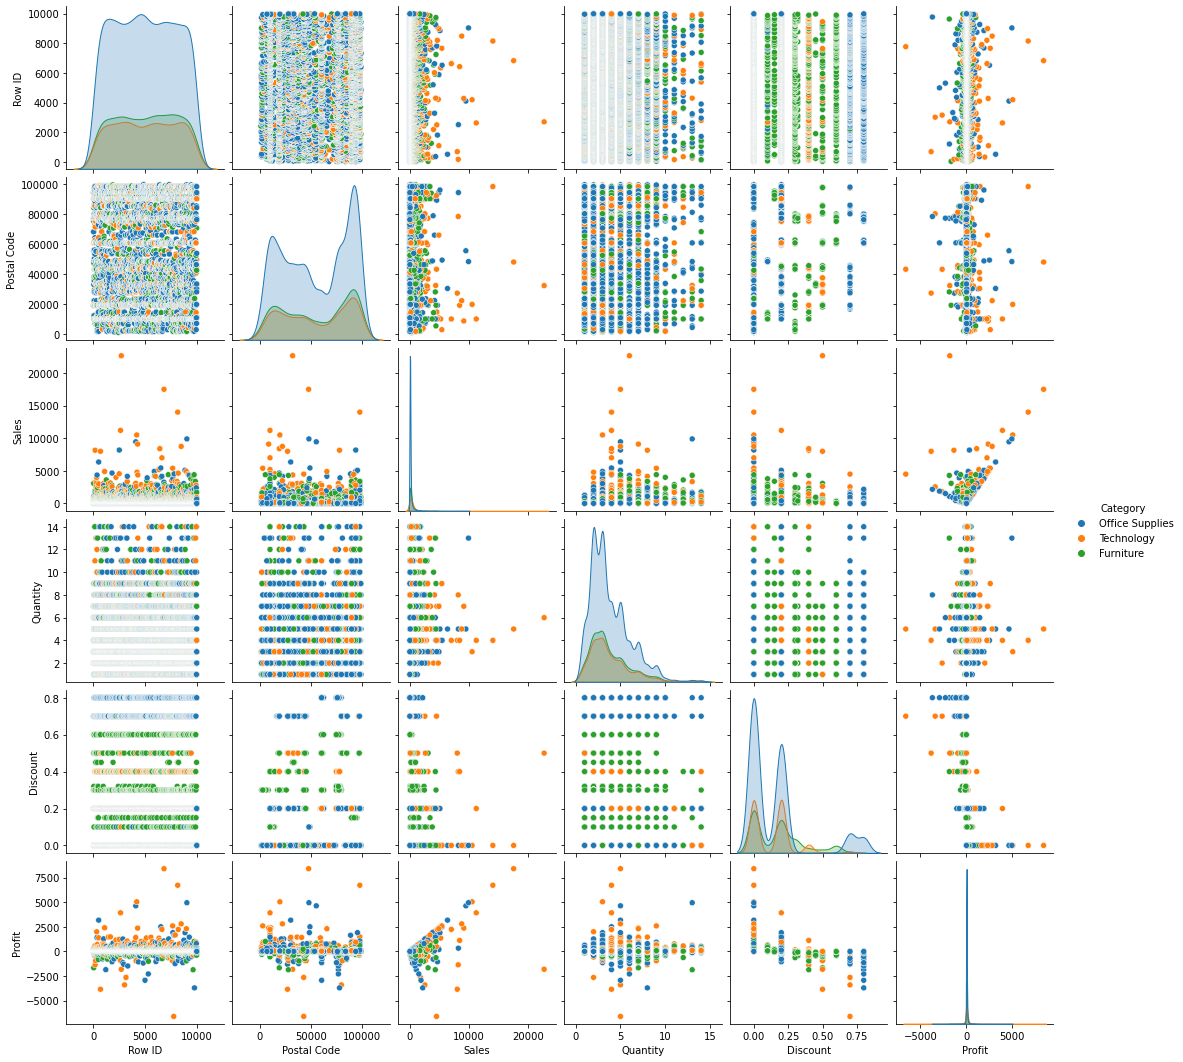

In [10]:
# Based on Category

sns.pairplot(df_walmart, hue = 'Category')

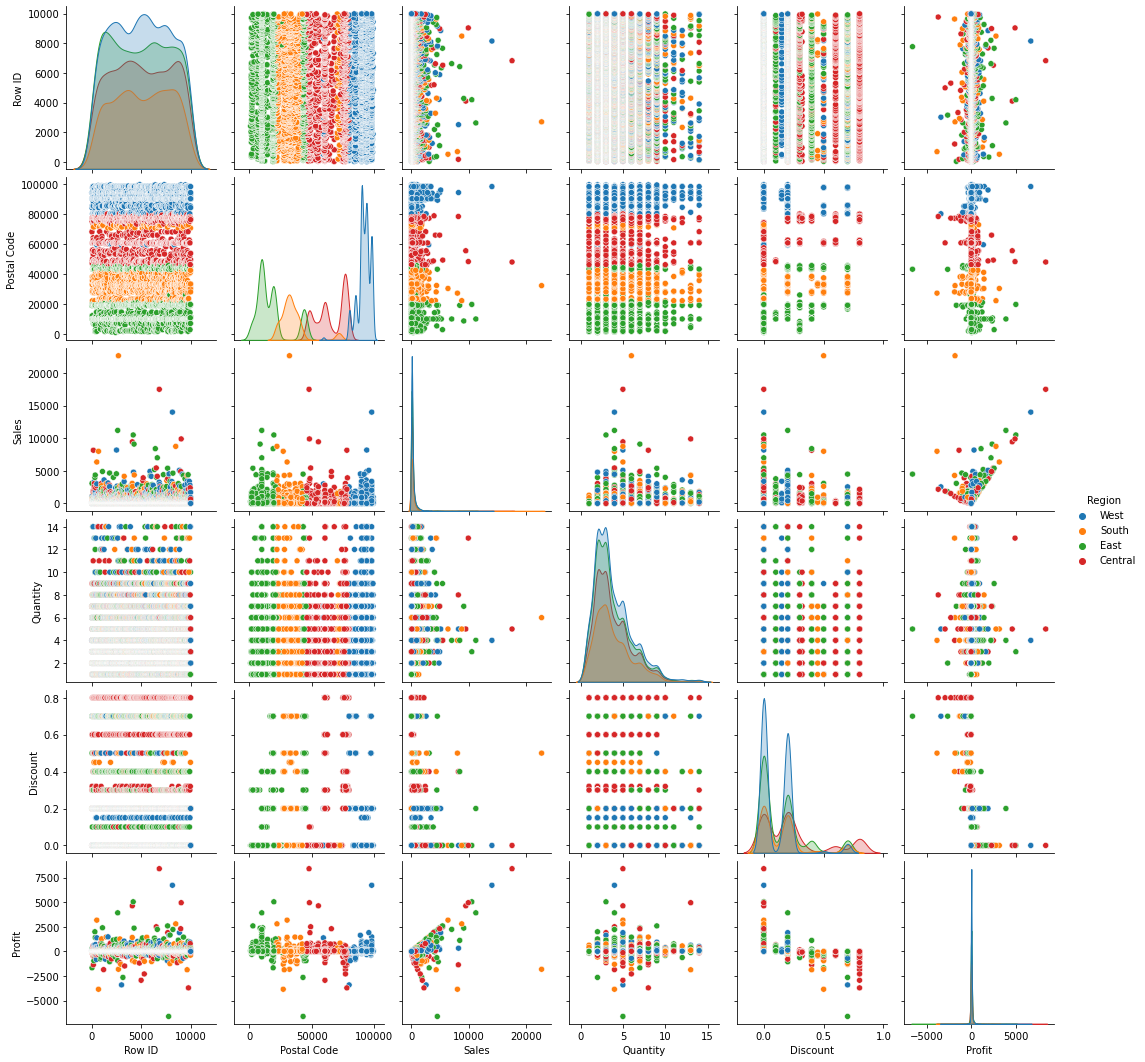

In [11]:
# Based on Region

sns.pairplot(df_walmart, hue = 'Region')
plt.show()

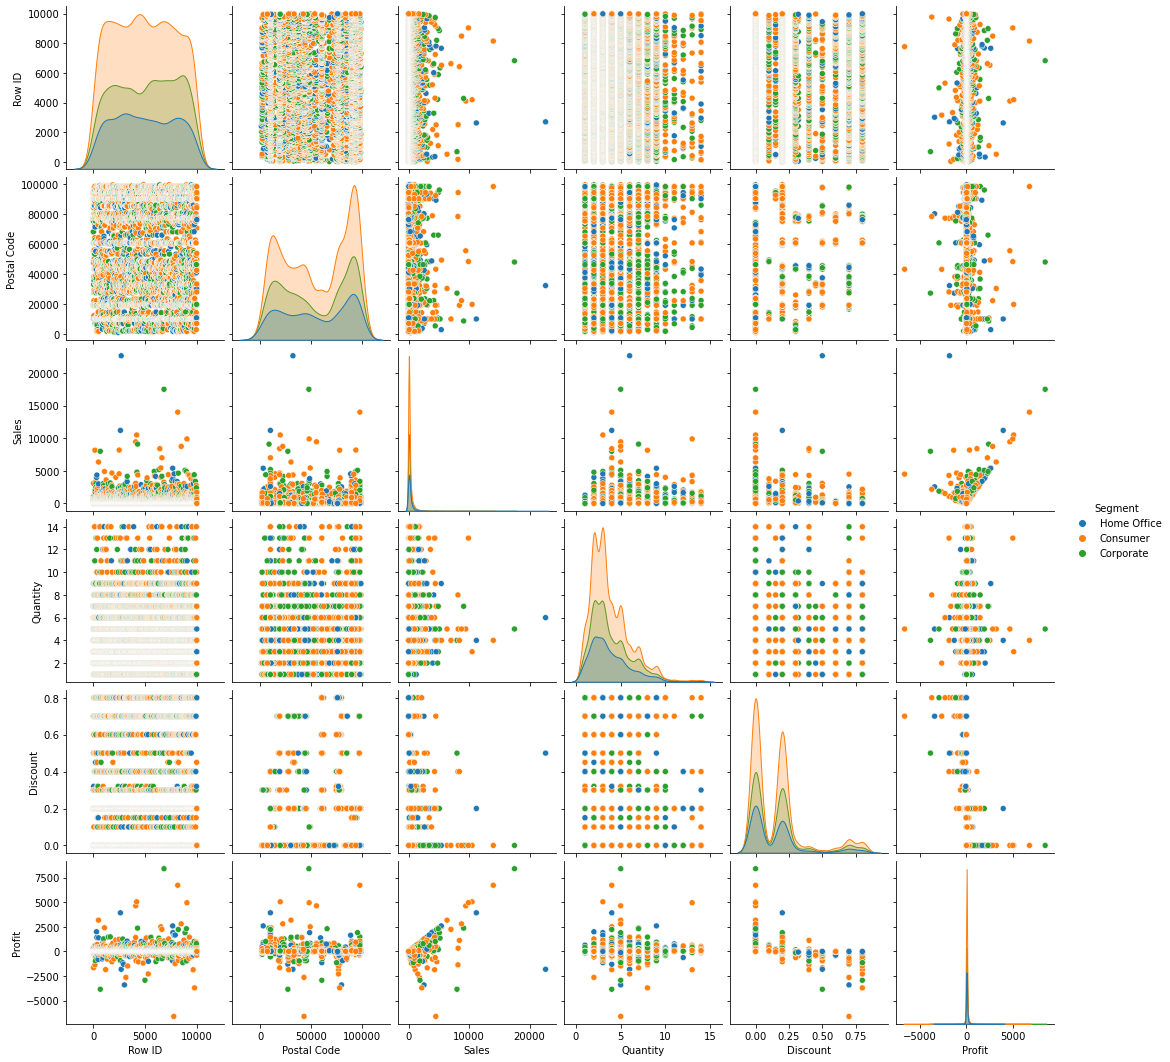

In [12]:
# Based on Segment

sns.pairplot(df_walmart, hue = 'Segment')
plt.show()

In [13]:
df_walmart.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,5016.463878,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.101298,32063.693350,623.245101,2.225110,0.206452,234.260108
min,20.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2518.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,5016.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7514.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


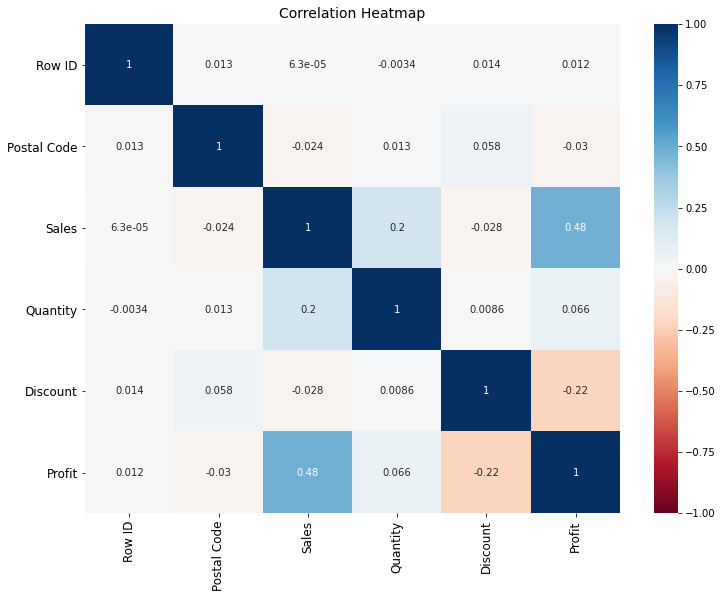

In [14]:
c = df_walmart.corr()
plt.figure(figsize = (12,9))
s = sns.heatmap(c, annot = True,
           cmap = 'RdBu',
           vmin = -1,
           vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap', fontsize = 14)
plt.show()

From the observation in the heatmap above, we see that,
1. Sales and Profit are moderately correlated.
2. Discount and Profit are Negatively correlated.
3. Quantity and Profit are less moderately correlated.

### Countplot of each columns

C:\Users\gregi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gregi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gregi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gregi\anaconda3\lib\si

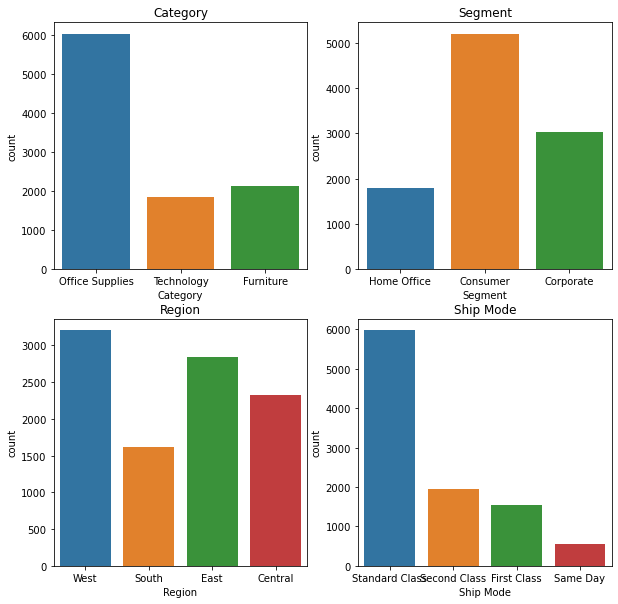

In [15]:
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
sns.countplot(df_walmart['Category'], ax = axs[0][0])
sns.countplot(df_walmart['Segment'], ax = axs[0][1])
sns.countplot(df_walmart['Region'], ax = axs[1][0])
sns.countplot(df_walmart['Ship Mode'], ax = axs[1][1])
axs[0][0].set_title('Category')
axs[0][1].set_title('Segment')
axs[1][0].set_title('Region')
axs[1][1].set_title('Ship Mode')
plt.show()

C:\Users\gregi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-16-6a43261b3272>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 12)


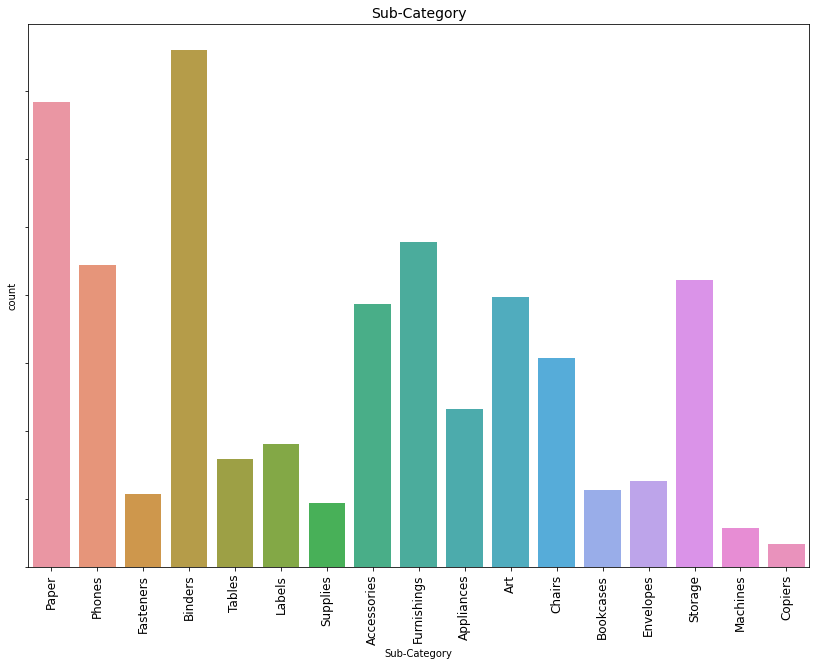

In [16]:
plt.figure(figsize = (14,10))
c = sns.countplot(df_walmart['Sub-Category'])
plt.title('Sub-Category', fontsize = 14)
c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 12)
c.set_xticklabels(c.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

C:\Users\gregi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-17-1cf8a0dff11b>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  d.set_yticklabels(d.get_yticklabels(), rotation = 0, fontsize = 12)


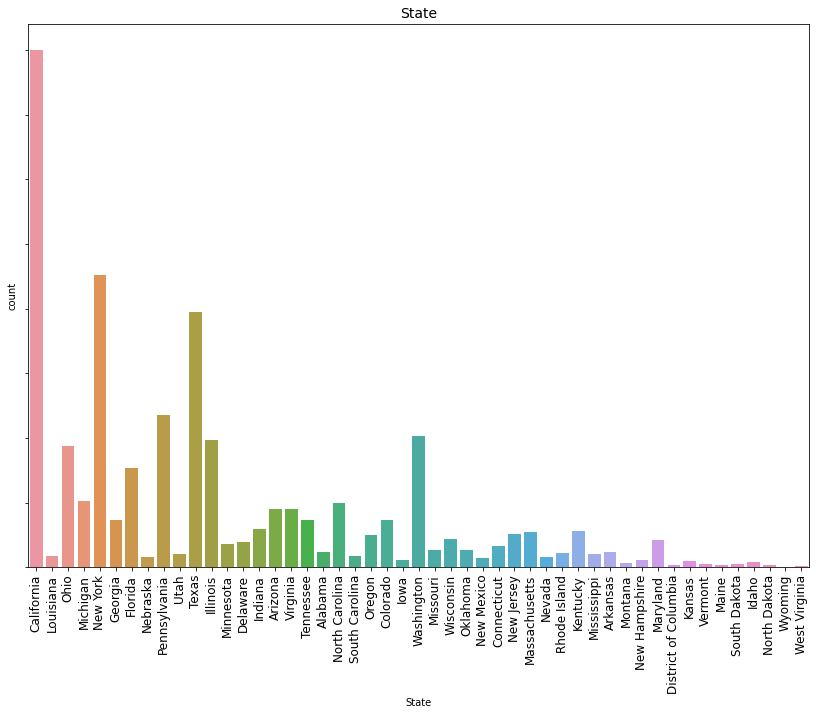

In [17]:
plt.figure(figsize = (14,10))
d = sns.countplot(df_walmart['State'])
plt.title('State', fontsize = 14)
d.set_yticklabels(d.get_yticklabels(), rotation = 0, fontsize = 12)
d.set_xticklabels(d.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

C:\Users\gregi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


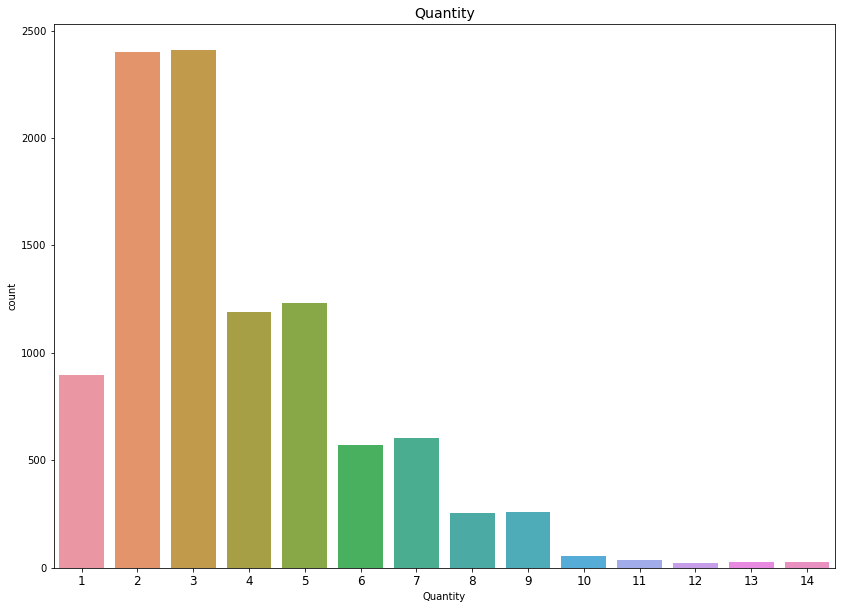

In [18]:
plt.figure(figsize = (14,10))
f = sns.countplot(df_walmart['Quantity'])
plt.title('Quantity', fontsize = 14)
f.set_xticklabels(f.get_xticklabels(), rotation = 0, fontsize = 12)
plt.show()

C:\Users\gregi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


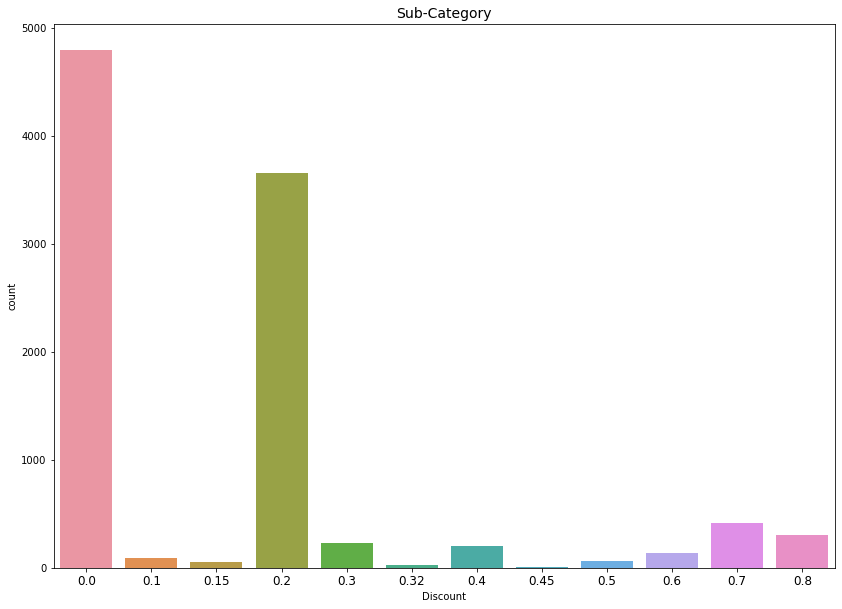

In [19]:
plt.figure(figsize = (14,10))
g = sns.countplot(df_walmart['Discount'])
plt.title('Sub-Category', fontsize = 14)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 12)
plt.show()

### Distribution Plot ( Distribution Analysis )

C:\Users\gregi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gregi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gregi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

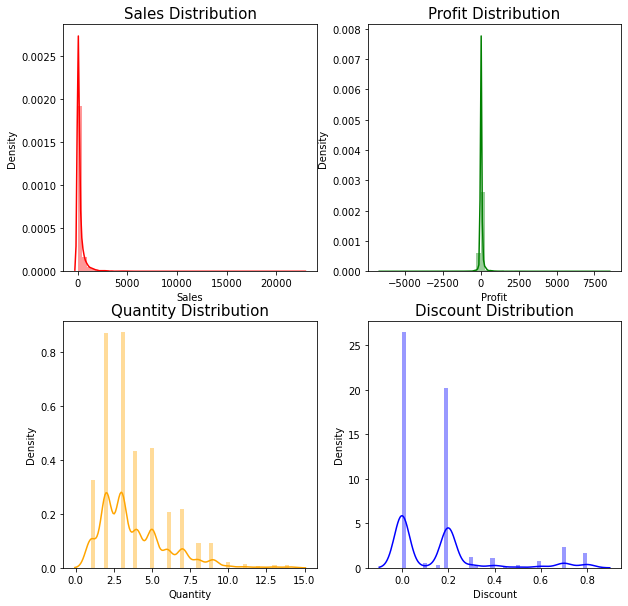

In [20]:
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10,10))
sns.distplot(df_walmart['Sales'], color = 'red', ax = axs[0][0])
sns.distplot(df_walmart['Profit'], color = 'green', ax = axs[0][1])
sns.distplot(df_walmart['Quantity'], color = 'orange', ax = axs[1][0])
sns.distplot(df_walmart['Discount'], color = 'blue', ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 15)
axs[0][1].set_title('Profit Distribution', fontsize = 15)
axs[1][0].set_title('Quantity Distribution', fontsize = 15)
axs[1][1].set_title('Discount Distribution', fontsize = 15)
plt.show()

### State Analysis ( Location Analysis )

In [22]:
df_walmart['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [32]:
df_walmart1 = df_walmart['State'].value_counts()
df_walmart1

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

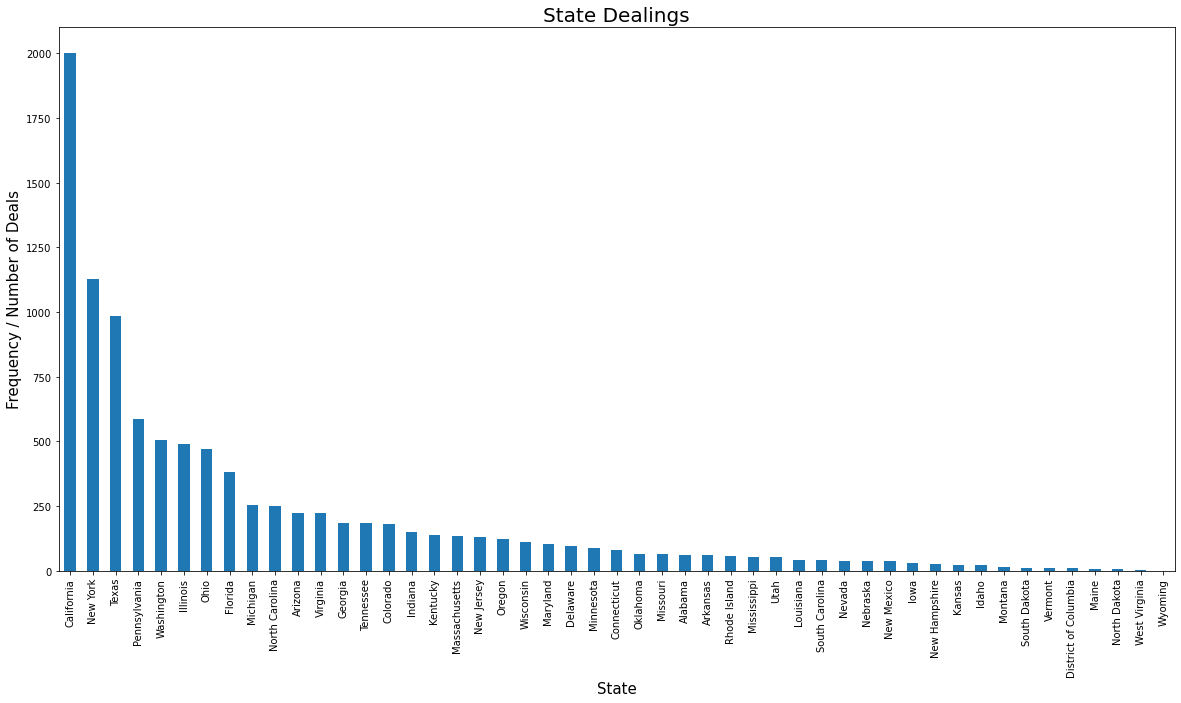

In [44]:
df_walmart1.plot(kind = 'bar', figsize = (20,10))
plt.ylabel('Frequency / Number of Deals', fontsize = 15)
plt.xlabel('State', fontsize = 15)
plt.title('State Dealings', fontsize = 20)
plt.show()

From the plot above we see the top states with the highest number of deals.
1. Califonia
2. New York 
3. Texas
4. Pennsylvania


However, the state with the lowest number of sales is Wyoming.

In [34]:
df_walmart['State'].value_counts().mean()

203.9591836734694

Average mean of State is = 203.96

### City Analysis

In [38]:
df_walmart2 = df_walmart['City'].value_counts()
df_walmart2 = df_walmart2.head(50)

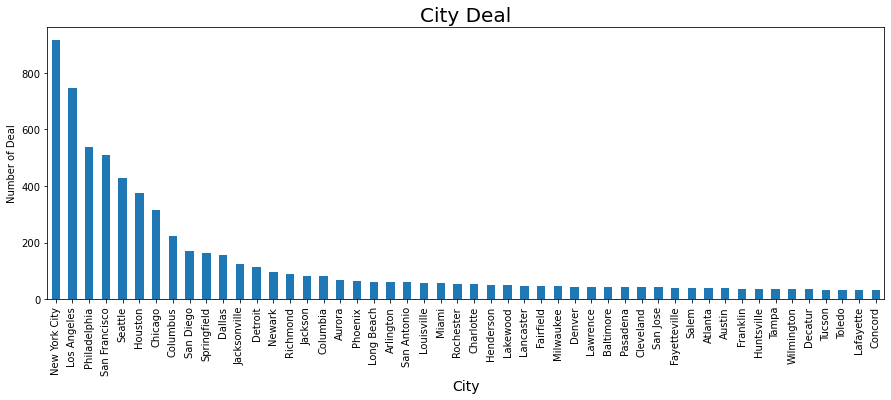

In [39]:
df_walmart2.plot(kind = 'bar', figsize = (15,5))
plt.ylabel('Number of Deal')
plt.xlabel('City',fontsize = 14 )
plt.title('City Deal', fontsize = 20)
plt.show()

Observation: From the above plot we see the top 4 Cities with the highest number of deals.
1. New York City
2. Los Angeles
3. Philadelphia
4. San Francisco

In [45]:
df_walmart['City'].value_counts().mean()

18.821092278719398

Average mean of City is = 18.82

### SEGMENT ANALYSIS of Profit, Discount and Sales

In [47]:
df_walmart['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [48]:
df_walmart_segment = df_walmart.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_walmart_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


C:\Users\gregi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


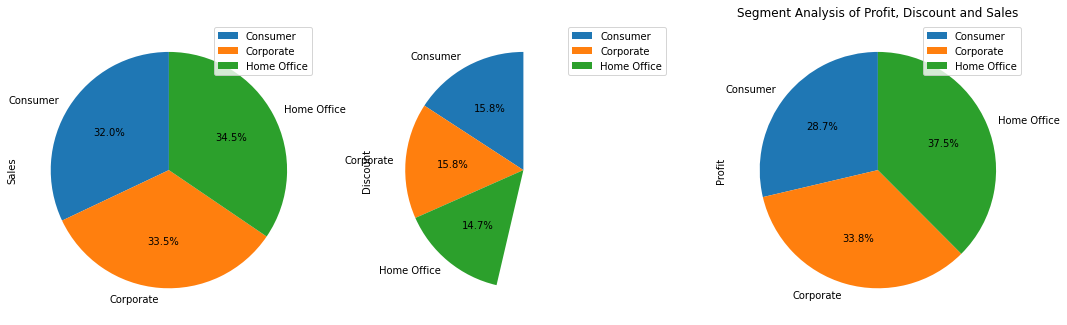

In [50]:
df_walmart_segment.plot.pie(subplots = True, autopct = '%1.1f%%', figsize = (18,20), startangle = 90, label = df_walmart_segment.index)
plt.title('Segment Analysis of Profit, Discount and Sales')
plt.show()

Sales: Consumer = 32.0%, Corporate = 33.5%, Home Office = 34.5% 
Discount: Consumer = 15.4%, Corporate = 15.8%, Home Office = 14.7%
Profit: Consumer = 28.7%, Corporate = 33.8%, Home Office = 37.5%

### STATE ANALYSIS of Sales, Discount and Profit

In [51]:
df_walmart['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [54]:
df_walmart_state = df_walmart.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_walmart_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


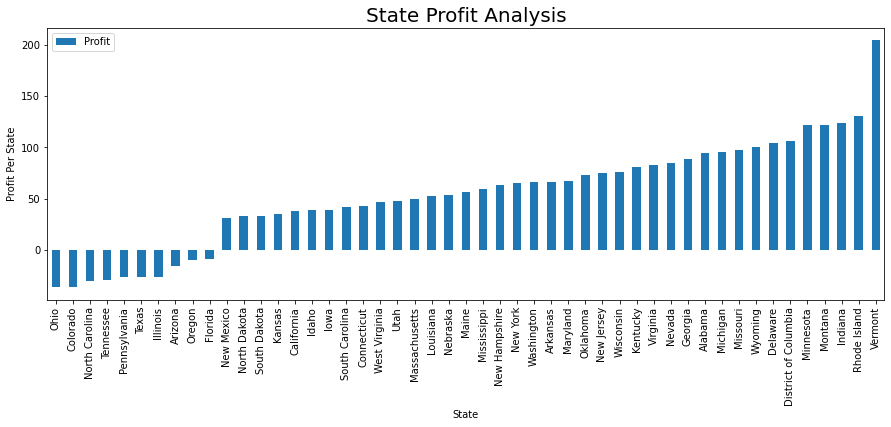

In [55]:
# 1. State Profit Analysis
df_walmart_state1 = df_walmart_state.sort_values('Profit')
df_walmart_state1[['Profit']].plot(kind = 'bar', figsize = (15,5))
plt.title('State Profit Analysis', fontsize = 20)
plt.ylabel('Profit Per State')
plt.xlabel('State')
plt.show()

Fromt the above plot, we see Vermont is the state that generated the highest profit.

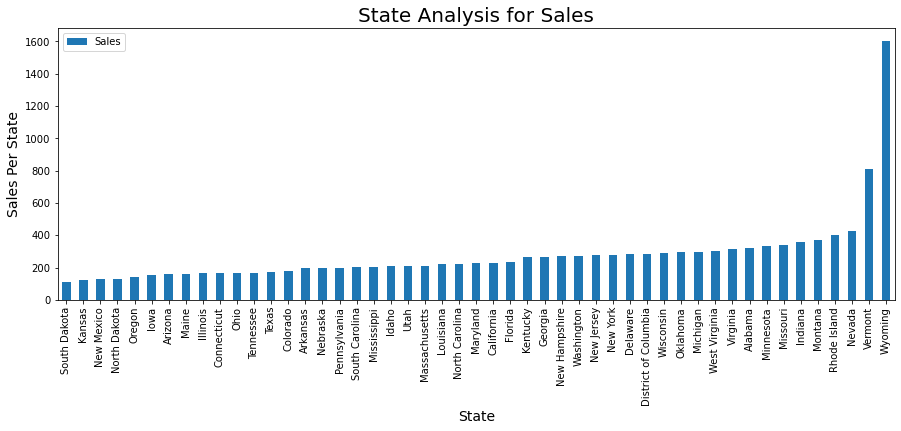

In [62]:
# 2. State Sales Analysis
df_walmart_state2 = df_walmart_state.sort_values('Sales')
df_walmart_state2[['Sales']].plot(kind = 'bar', figsize = (15,5),)
plt.title('State Analysis for Sales', fontsize = 20)
plt.xlabel('State', fontsize = 14)
plt.ylabel('Sales Per State', fontsize = 14)
plt.show()

From the plot Above we see that Wyoming is the state with the highest Sales.

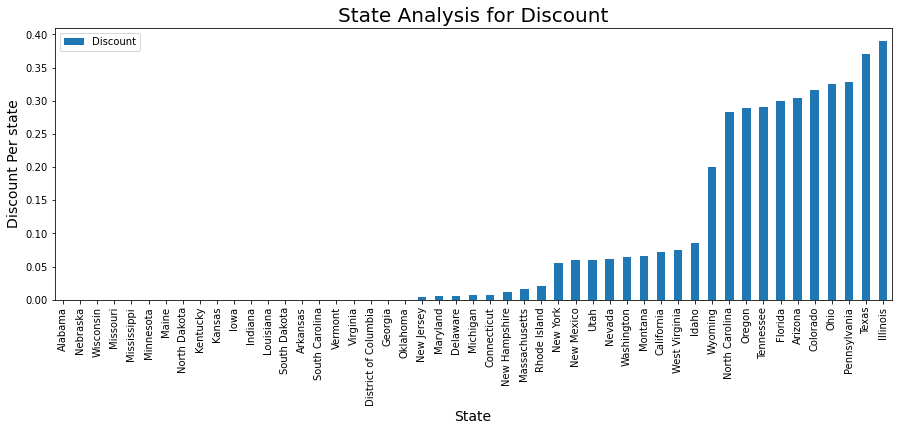

In [63]:
# 3. State Discount Analysis
df_walmart_state3 = df_walmart_state.sort_values('Discount')
df_walmart_state3[['Discount']].plot(kind = 'bar', figsize = (15,5),)
plt.title('State Analysis for Discount', fontsize = 20)
plt.xlabel('State', fontsize = 14)
plt.ylabel('Discount Per state', fontsize = 14)
plt.show()

From the above plot we see that Illinois State has the Highest Discount

### City Analysis of Profit

In [65]:
df_walmart_city = df_walmart.groupby(['City'])[['Profit', 'Sales', 'Discount']].mean()
df_walmart_city

,Profit,Sales,Discount
City,,,
Aberdeen,6.630000,25.500000,0.000000
Abilene,-3.758400,1.392000,0.800000
Akron,-8.887410,129.999333,0.357143
Albuquerque,45.292007,158.582857,0.057143
Alexandria,19.913644,344.973125,0.000000
...,...,...,...
Woonsocket,19.669775,48.887500,0.000000
Yonkers,184.517047,510.511067,0.066667
York,-20.433840,163.595600,0.420000


In [67]:
df_walmart_city = df_walmart_city.sort_values('Profit')
df_walmart_city.head(50)

,Profit,Sales,Discount
City,,,
Bethlehem,-200.619160,337.926800,0.380000
Champaign,-182.352000,151.960000,0.600000
Oswego,-178.709200,107.326000,0.600000
Round Rock,-169.061614,693.436114,0.274286
Lancaster,-157.371052,215.031826,0.315217
Clarksville,-150.764743,316.818571,0.271429
Medina,-149.227178,275.302444,0.433333
Burlington,-144.915088,866.723280,0.136000
San Antonio,-123.712715,370.229288,0.383051


### Low Profit

<ipython-input-71-301c47928103>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Analysis of Cities with low Profit', Fontsize = 16)


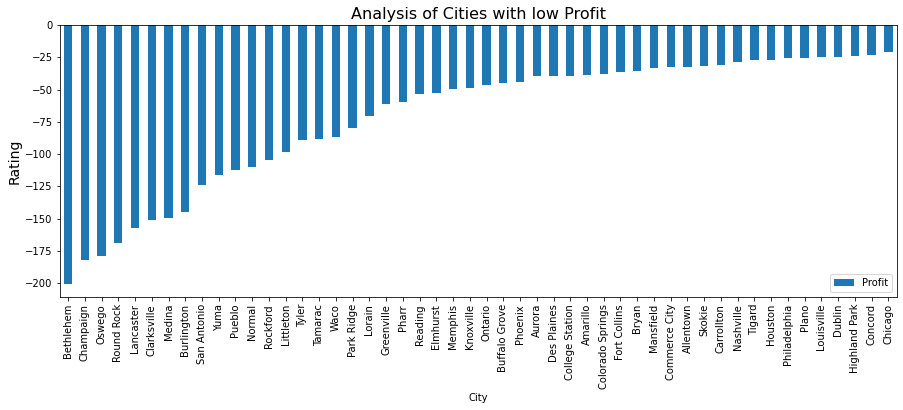

In [71]:
df_walmart_city[['Profit']].head(50).plot(kind = 'bar', figsize = (15,5))
plt.title('Analysis of Cities with low Profit', Fontsize = 16)
plt.ylabel('Rating', fontsize = 14)
plt.show()

From the plot we see that Bethlehem is the City with the Lowest Profit.

### Highest Profit

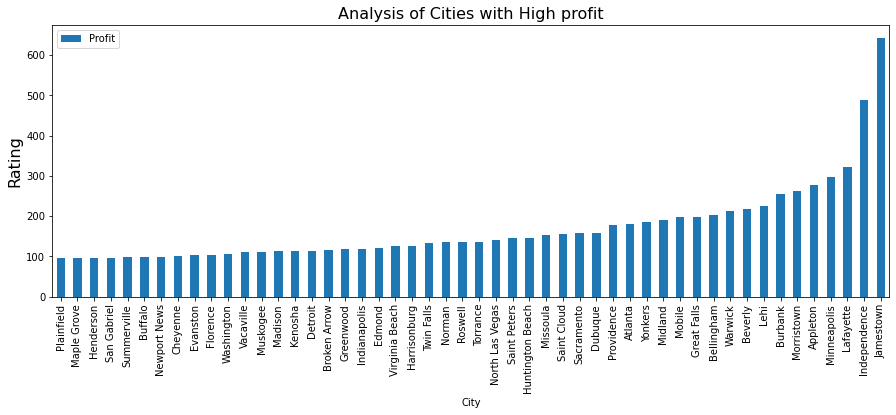

In [74]:
df_walmart_city[['Profit']].tail(50).plot(kind = 'bar', figsize = (15,5))
plt.title('Analysis of Cities with High profit', fontsize = 16)
plt.ylabel('Rating', fontsize = 16)
plt.show()

From the Plot above we see that Jamestown is the City with the Highest Profit. 

### QUANTITY ANALYSIS of Sales, Profit and Discount 

In [75]:
df_walmart_quantity = df_walmart.groupby(['Quantity'])[['Profit', 'Sales', 'Discount']].mean()
df_walmart_quantity.head(50)

,Profit,Sales,Discount
Quantity,,,
1,8.276396,59.234632,0.152959
2,16.006831,120.354488,0.154858
3,23.667715,175.201578,0.153329
4,37.131310,271.764059,0.157708
5,40.257394,337.936339,0.157146
6,18.051517,362.101960,0.166556
7,56.579163,395.888393,0.161980
8,42.244342,458.210802,0.171595
9,68.557716,498.083683,0.147946


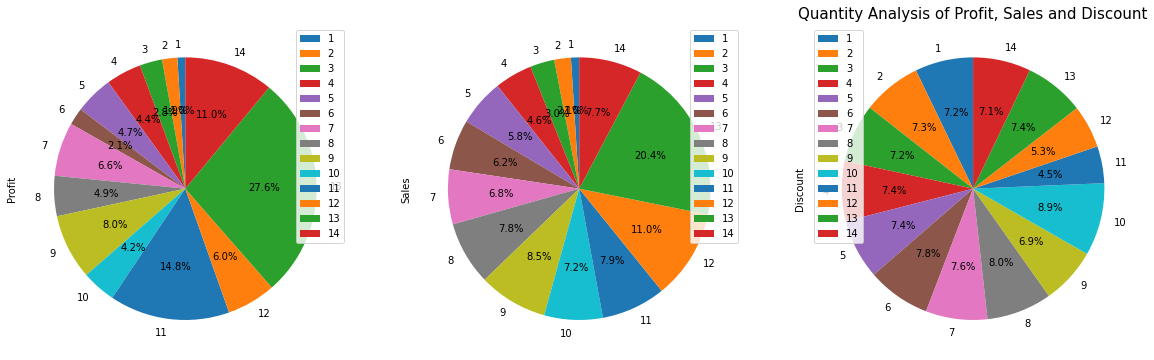

In [82]:
df_walmart_quantity.plot.pie(subplots = True, autopct = '%1.1f%%', figsize = (20,20), startangle = 90, label = df_walmart_quantity.index)
plt.title('Quantity Analysis of Profit, Sales and Discount', fontsize = 15)
plt.show()

### CATEGORY ANALYSIS of Sales, Discount and Profit 

In [84]:
df_walmart_category = df_walmart.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_walmart_category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


C:\Users\gregi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


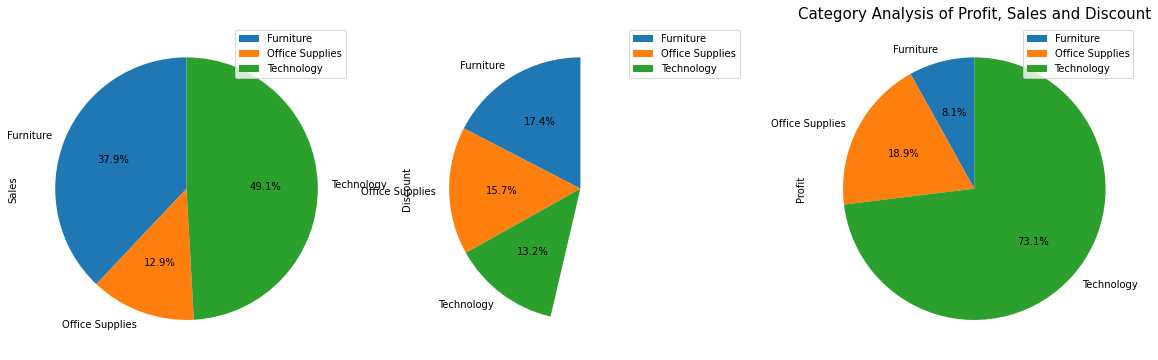

In [85]:
df_walmart_category.plot.pie(subplots = True, autopct = '%1.1f%%', figsize = (20,20), startangle = 90, label = df_walmart_category.index)
plt.title('Category Analysis of Profit, Sales and Discount', fontsize = 15)
plt.show()

### Sub-Category Analysis of Sales, Profit and Discount

In [89]:
df_walmart_sub = df_walmart.groupby(['Sub-Category'])[['Profit', 'Sales', 'Discount']].mean()
df_walmart_sub

,Profit,Sales,Discount
Sub-Category,,,
Accessories,54.111788,215.974604,0.078452
Appliances,38.922758,230.755710,0.166524
Art,8.200737,34.068834,0.074874
Binders,19.843574,133.560560,0.372292
Bookcases,-15.230509,503.859633,0.211140
Chairs,43.095894,532.332420,0.170178
Copiers,817.909190,2198.941618,0.161765
Envelopes,27.418019,64.867724,0.080315
Fasteners,4.375660,13.936774,0.082028


In [92]:
df_walmart_subc = df_walmart_sub.sort_values('Profit')

<function matplotlib.pyplot.show(close=None, block=None)>

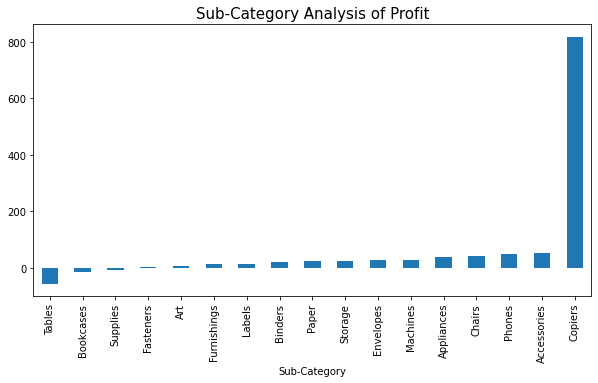

In [93]:
df_walmart_subc['Profit'].plot(kind = 'bar', figsize = (10,5))
plt.title('Sub-Category Analysis with respect to Profit', fontsize = 15)
plt.show

Copiers have the highest Profit

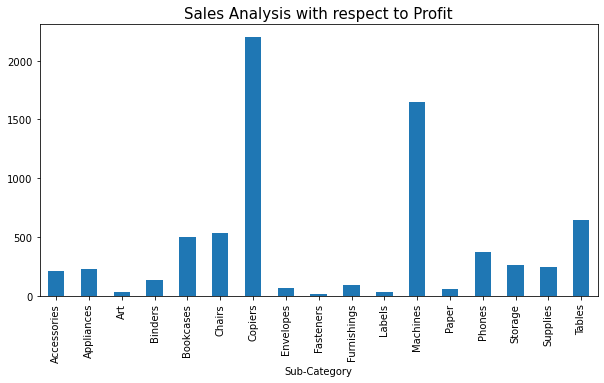

In [97]:
df_walmart_sub['Sales'].plot(kind = 'bar', figsize = (10,5))
plt.title('Sales Analysis with respect to Profit', fontsize = 15)
plt.show()

From the above plot Copiers and Machines have the highest Sales.

### Region Analysis of Sales, Profit and Discount

In [101]:
df_walmart_region = df_walmart.groupby(['Region'])[['Profit', 'Sales', 'Discount']].mean()
df_walmart_region

,Profit,Sales,Discount
Region,,,
Central,17.092709,215.772661,0.240353
East,32.135808,238.336110,0.145365
South,28.857673,241.803645,0.147253
West,33.849032,226.493233,0.109335


C:\Users\gregi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


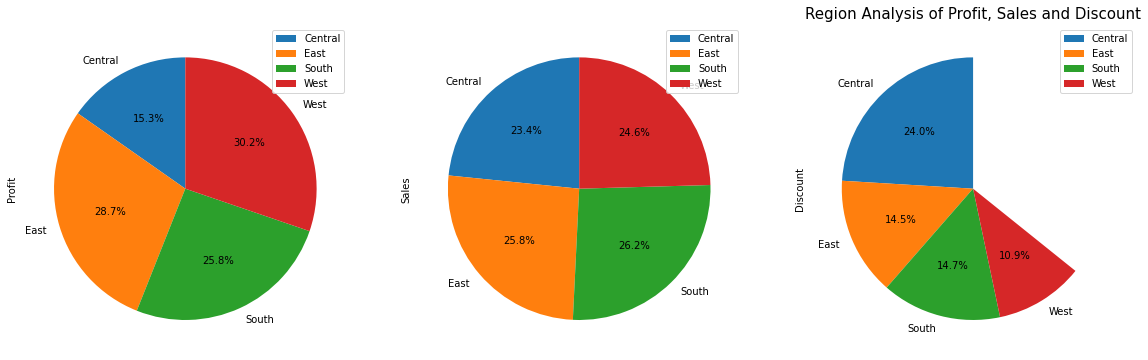

In [102]:
df_walmart_region.plot.pie(subplots = True, autopct = '%1.1f%%', figsize = (20,20), startangle = 90, label = df_walmart_region.index)
plt.title('Region Analysis of Profit, Sales and Discount', fontsize = 15)
plt.show()

West Profit is High

### Ship Mode Analysis of Sales, Profit and Discount

In [105]:
df_walmart_ship = df_walmart.groupby(['Ship Mode'])[['Profit', 'Sales', 'Discount']].mean()
df_walmart_ship

,Profit,Sales,Discount
Ship Mode,,,
First Class,31.839948,228.497024,0.164610
Same Day,29.266591,236.396179,0.152394
Second Class,29.535545,236.089239,0.138895
Standard Class,27.494770,227.583067,0.160023


C:\Users\gregi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


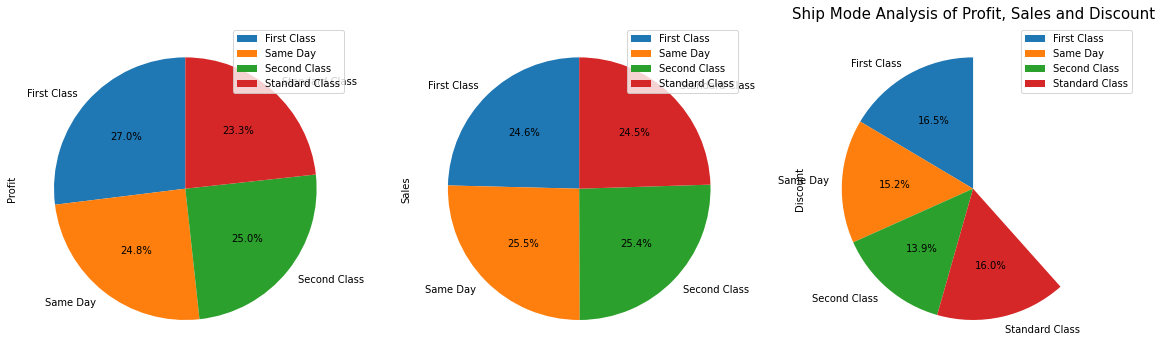

In [106]:
df_walmart_ship.plot.pie(subplots = True, autopct = '%1.1f%%', figsize = (20,20), startangle = 90, label = df_walmart_ship.index)
plt.title('Ship Mode Analysis of Profit, Sales and Discount', fontsize = 15)
plt.show()

   ### CONCLUSION:    

1. Sales and Profit are moderately correlated
2. Discount and Profit are negatively correlated
3. The top three states with highest deals are Califonia, New york and Texas
4. Profit is more than that of Sales but there are some area where Profit could be increased.
5. Profit and Discount is high in First Class
6. Sales is high for some day ship
7. In Sub-Category, Copiers have high Profit and Sales.
8. In Sub-Category, Binders, Machines and Table, have high Discount
9. In Category, Technology has maximium Sales and Profit
10. In Segment, Home Office has High Profit and Sales. Here is the top three city with Highest Deals are New York City, Los Angeles and Philiandelphia.
11. Wyoming has lowest number of deal but has highest amount of cells. While South Dakota has the Lowest amount of sales.S